# Прогнозируем цену недвижимости
####  C помощью множественной линейной регрессии

In [15]:
from sklearn.datasets import load_boston # Бостонский дата-сет
from sklearn.model_selection import train_test_split # функ-ия для тестов линейной регрессии
from sklearn.linear_model import LinearRegression # модель линейной регрессии

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# линейная регрессия с доп. функциями
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

## Импортируем и изучаем dataset

In [2]:
boston_dataset = load_boston()

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

In [3]:
dir(boston_dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [5]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Вносим данные в Pandas DataFrame

In [9]:
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

data['PRICE'] = boston_dataset.target

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Проверка на отсутсвующие данные

In [13]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Визуализация имеющихся данных

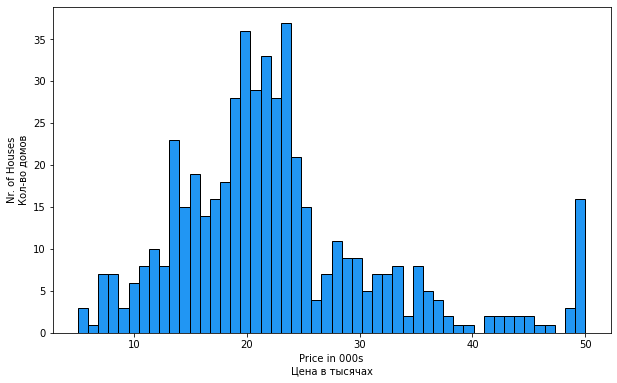

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(data['PRICE'], bins=50, ec='black', color='#2196f3')
plt.xlabel('Price in 000s\nЦена в тысячах')
plt.ylabel('Nr. of Houses\nКол-во домов')
plt.show()

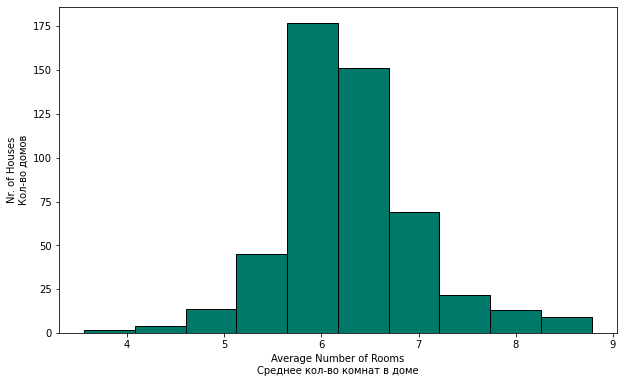

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(data['RM'], ec='black', color='#00796b')
plt.xlabel('Average Number of Rooms\nСреднее кол-во комнат в доме')
plt.ylabel('Nr. of Houses\nКол-во домов')
plt.show()

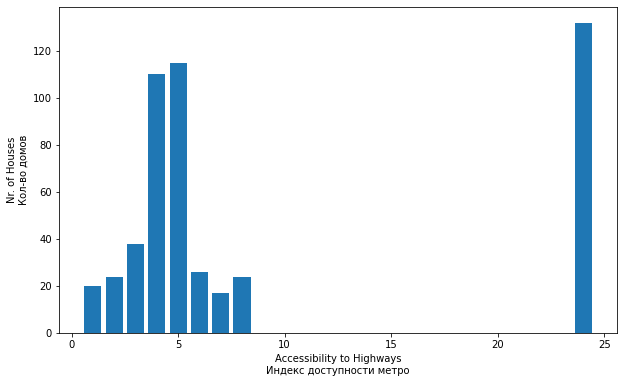

In [37]:
frequency = data['RAD'].value_counts()

plt.figure(figsize=(10,6))
plt.xlabel('Accessibility to Highways\nИндекс доступности метро')
plt.ylabel('Nr. of Houses\nКол-во домов')
plt.bar(frequency.index, height=frequency)
plt.show()

In [38]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Корреляции

In [39]:
data['PRICE'].corr(data['RM'])

0.6953599470715394

In [41]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375621

In [42]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [44]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

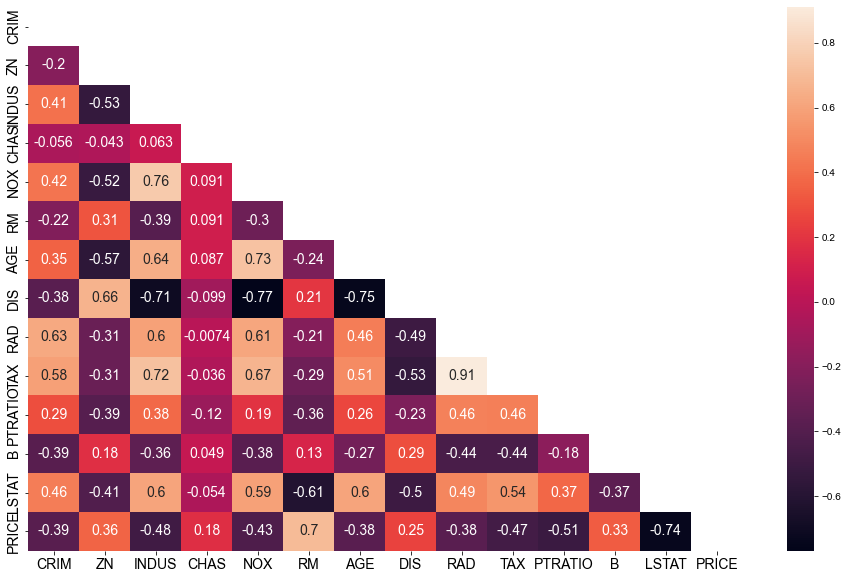

In [45]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

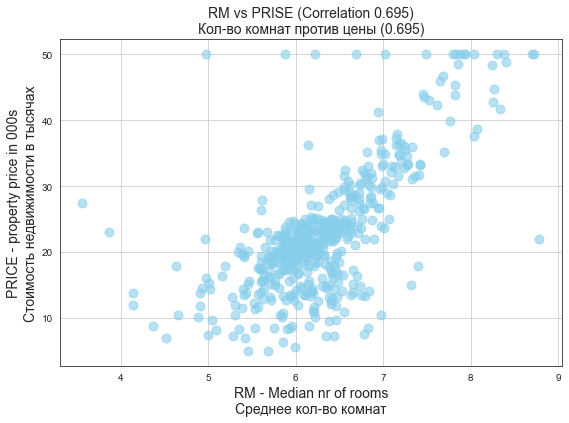

In [56]:
rm_tgt_corr = round(data['RM'].corr(data['PRICE']), 3)

plt.figure(figsize=(9, 6))
plt.scatter(x=data['RM'], y=data['PRICE'], alpha=0.6, s=80, color='skyblue')

plt.title(f'RM vs PRISE (Correlation {rm_tgt_corr})\nКол-во комнат против цены ({rm_tgt_corr})', fontsize=14)
plt.xlabel('RM - Median nr of rooms\nСреднее кол-во комнат', fontsize=14)
plt.ylabel('PRICE - property price in 000s\nСтоимость недвижимости в тысячах', fontsize=14)
plt.grid()
plt.show()

C:\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


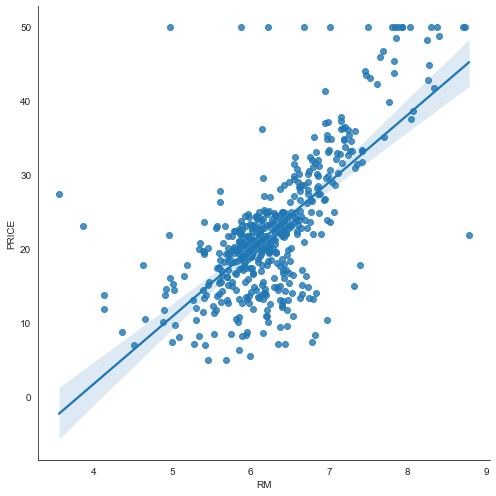

In [58]:
sns.lmplot(x='RM', y='PRICE', data=data, size=7)
plt.show()

# Тенденции корреляции - положительные

## Обучание линейной регрессии 

In [60]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)
# Разбиваем данные на те, на которых мы будем учить моедль и на те, на которых мы будем тестировать модель

## Мультилинейная регрессия

In [64]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('r-squared - коэффициент детерминации (насколько наша модель точная)\n')
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

r-squared - коэффициент детерминации (насколько наша модель точная)

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115658
Intercept 36.53305138282472


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Трансформируем выбросы в ценах
#### Логарифмическое преобразование

In [65]:
data['PRICE'].skew()

1.1080984082549072

In [66]:
data['PRICE'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64>

In [69]:
y_log = np.log(data['PRICE'])

y_log.tail()

# Переведем все цены в логарифмы чтобы все огромные значения были невелированы логорифмами

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [70]:
y_log.skew()

-0.33032129530987864

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


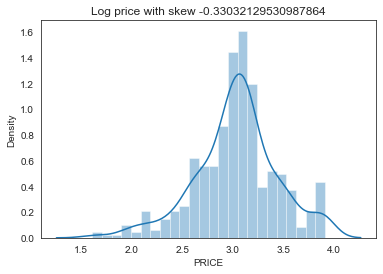

In [72]:
sns.distplot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

# Теперь распределение цен больше походит на нормальное распределение

## Запускаем модель с лог. значениями

In [74]:
prices = np.log(data['PRICE'])
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Training data r-squared: 0.7930234826697584
Test data r-squared: 0.7446922306260745
Intercept 4.0599438717751966


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


### Можно ли что-то выкинуть из модели

In [76]:
# Тестируем по таким параметрам:

# p-value (значение статистической важности параметра)
# VIF (мультиколлинеарность)

In [80]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

# results.params
# results.pvalues

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

#Если p-value > 0.05 - то мы можем поставить под сомнение этот показатель

,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


#### Мультиколлинеарность (насколько параметр связан с другими параметрами)
#### Как считается - используем VIF. Строим линейную регрессию но вместо цены мы подставляем параметр и пытаемся его предсказать. Потом мы считаем для этой линейной регрессии коэффициент детерминации (который мы использовалит в прошлом, для оценки нашей модели). Чем лучше наша линейная регрессия - тем хуже (означет, что между ними есть корреляция и мы можем объяснить с помощью одних переменных другую).

In [81]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [84]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

# Эта функция и считает VIF

1.7145250443932492

In [85]:
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range(X_incl_const.shape[1])]

pd.DataFrame({'coef_name': X_incl_const.columns, 'vif': np.around(vif, 2)})

# По хорошему, VIF должен быть < 5, но мы смотрим < 10

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## Упростим с BIC
#### чем меньше BIC - тем лучше

In [86]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -139.74997769478875
r-squared is 0.7930234826697583


In [87]:
# Пробуем выкинуть indus и посмотреть показатель BIC & r-squared:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

coef_ex_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -145.14508855591185
r-squared is 0.7927126289415164


In [88]:
# Пробуем выкинуть indus, age и посмотреть показатель BIC & r-squared:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)

model = sm.OLS(y_train, X_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is', results.bic)
print('r-squared is', results.rsquared)

BIC is -149.49934294224678
r-squared is 0.7918657661852815


In [91]:
frames = [org_coef, reduced_coef]
pd.concat(frames, axis=1)

# Соответственно, что мы убрали - там не считается коэффициент (градиентный наклон)

,coef,p-value,coef,p-value
const,4.059944,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN
CHAS,0.080331,0.038,0.086449,0.025
NOX,-0.704068,0.000,-0.616448,0.000
RM,0.073404,0.000,0.076133,0.000
AGE,0.000763,0.209,NaN,NaN
DIS,-0.047633,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.013743,0.000


In [92]:
# Главное, что кф не сильно изменились - это значит, что у параметров, которыен мы убрали была низкая коллинеарность

## Остатки и остатки для интервалов *residuals
#### Это разница между значением цены, которую предсказала наша модель, и той ценой, которую мы дали при тренировке модели. (По факту - считаем среднеквадратическую ошибку). В наших ошибках не должно быть закономерностей!

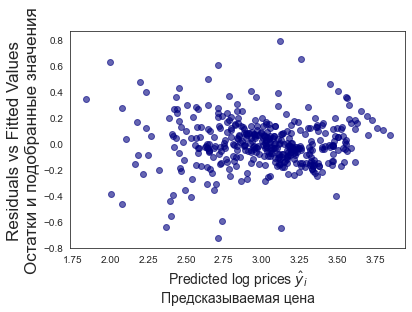

In [96]:
prives = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

X_inc_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$\nПредсказываемая цена', fontsize=14)
plt.ylabel('Residuals vs Fitted Values\nОстатки и подобранные значения', fontsize=17)

plt.show()

# В данном случае - точки ошибок разбросаны рандомно, значит, что закономерностей нет
# (они бы были, если бы ошибки вырисовывались, в основном, в прямую на графике)

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


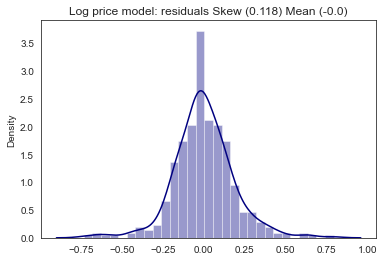

In [98]:
# Cмотрим распределение этих ошибок
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='navy')
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Ошибки образуют нормальное распределение и это прекрасно. Мы убедились, что модель не имеет закономерности в ошибках. 

## Предсказание с доверительным интервалом

In [101]:
# Cчитаем средне-квадратичное всех наших ошибок, берем из него корень,
# получаем стандартное отклонение (окр. до 3 зн.)
reduced_log_mse = round(results.mse_resid, 3)

print('2 CKO в логарифмах', 2*np.sqrt(reduced_log_mse))

# Для верхней границы добавляем к спрогнозируемой цене 2 стандартных отклонения
upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)

# Для нижней границы отнимаем от спрогнозируемой цены 2 стандартных отклонения
lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in normal prices is $', np.e**lower_bound * 1000)

2 CKO в логарифмах 0.37416573867739417
The upper bound in normal prices is $ 43613.34233239937
The lower bound in normal prices is $ 20635.886906824155


### Вероятность, что недвижимость попадет в интервал, который мы получили сверху ≈ 95%